In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel('G:/datasets/Flight_Fare_prediction/Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [10]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-31 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-31 05:50:00,2021-07-31 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-31 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-31 18:05:00,2021-07-31 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-31 16:50:00,2021-07-31 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [16]:
def extract_hour(df, col):
    df[col + '_hour'] = df[col].dt.hour
    
def extract_minute(df, col):
    df[col + '_minute'] = df[col].dt.minute
    
def drop_column(df, col):
    df.drop(col, axis=1, inplace=True)

In [17]:
extract_hour(train_data, 'Dep_Time')
extract_minute(train_data, 'Dep_Time')
drop_column(train_data, 'Dep_Time')

In [18]:
extract_hour(train_data, 'Arrival_Time')
extract_minute(train_data, 'Arrival_Time')
drop_column(train_data, 'Arrival_Time')

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
duration = list(train_data['Duration'])

In [21]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [22]:
train_data['Duration'] = duration

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [25]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_mins'] = train_data['Duration'].apply(minute)

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [27]:
drop_column(train_data, 'Duration')

In [28]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [29]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_mins'] = train_data['Duration_mins'].astype(int)

In [30]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [31]:
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [32]:
cont_col = [col for col in train_data.columns if train_data[col].dtype != 'O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [33]:
categorical = train_data[cat_col]

In [34]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [35]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

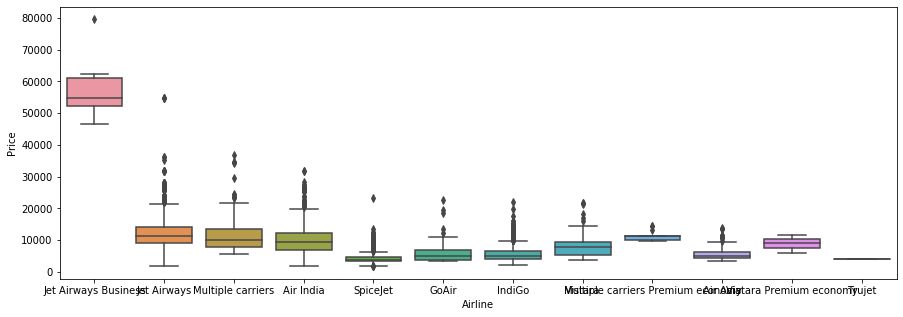

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False))

In [37]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


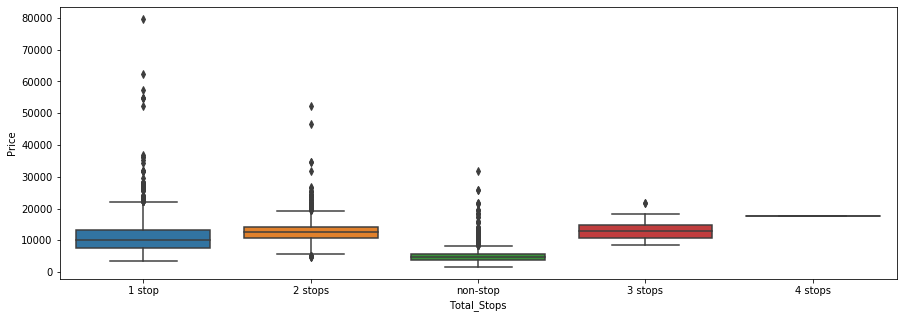

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price', ascending=False))

In [39]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)

In [40]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [41]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

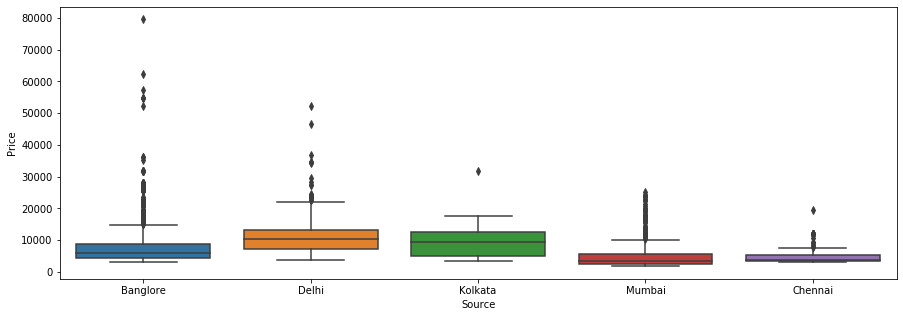

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False))

In [43]:
Source = pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

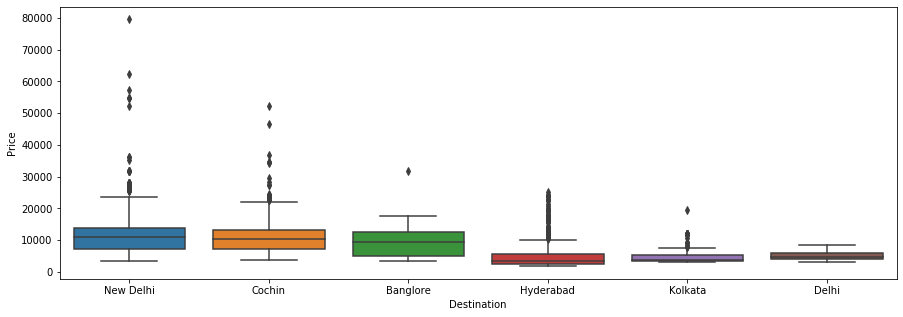

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination', y='Price', data=train_data.sort_values('Price', ascending=False))

In [46]:
Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [48]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [49]:
drop_column(categorical, 'Route')

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [51]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [52]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [53]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [54]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
encoder = LabelEncoder()

In [57]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [58]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [60]:
drop_column(categorical, 'Additional_Info')

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [62]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [63]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [65]:
data_train = pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]], axis=1)

In [66]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [67]:
drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')

In [68]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [69]:
pd.set_option('display.max_columns', 35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [70]:
def plot(df,col):
    fig,(ax1, ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

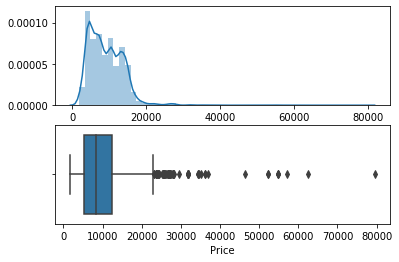

In [71]:
plot(data_train, 'Price')

In [72]:
data_train['Price'] = np.where(data_train['Price']>=40000, data_train['Price'].median(),data_train['Price'])

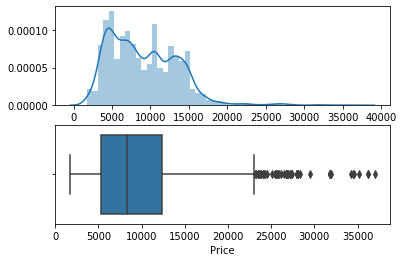

In [73]:
plot(data_train, 'Price')

In [74]:
X = data_train.drop('Price', axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [75]:
y = data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [76]:
from sklearn.feature_selection import mutual_info_classif

In [77]:
mutual_info_classif(X, y)

array([2.12876234, 2.03940421, 2.79190118, 2.28339864, 1.42782042,
       0.77950136, 0.74451339, 0.09647733, 0.6679585 , 0.92819552,
       0.00907306, 0.56067245, 0.00519561, 0.31835026, 0.00630988,
       0.22027136, 0.00401366, 0.17648515, 1.55499074, 0.87184573,
       0.2909046 , 1.53926992, 0.39739143, 0.30477726, 0.16582481,
       0.36160117, 1.08070763, 0.86335622, 1.40812948, 1.20135392,
       1.85131273, 1.51611044, 1.77226878, 1.08544348])

In [78]:
imp = pd.DataFrame(mutual_info_classif(X, y), index=X.columns)
imp

,0
Total_Stops,2.153835
Route_1,2.034676
Route_2,2.789079
Route_3,2.275664
Route_4,1.508892
Route_5,0.776279
Air India,0.747154
GoAir,0.103311
IndiGo,0.677485
Jet Airways,0.922115


In [79]:
imp.columns = ['importance']
imp.sort_values(by='importance', ascending=False)

,importance
Route_2,2.789079
Route_3,2.275664
Total_Stops,2.153835
Route_1,2.034676
Arrival_Time_hour,1.832800
Duration_hours,1.771570
Cochin,1.573106
Delhi,1.542211
Arrival_Time_minute,1.527403
Route_4,1.508892


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
from sklearn import metrics
import pickle 
def predict(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print('Training score : {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are :\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score is : {}'.format(r2_score))
    
    print('MAE : ', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE : ', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_absolute_error(y_test, y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        file = open('G:\datasets\Flight_Fare_prediction/model.pkl', 'wb')
        pickle.dump(model,file)

In [89]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9551897952961889
Predictions are :
 [ 6869.115      12667.28       13033.7545     ... 10073.015
  4802.94        7089.34666667]


r2 score is : 0.8146582289909552
MAE :  1180.1093063233106
MSE :  3610472.8045221562
RMSE :  34.35271905283933


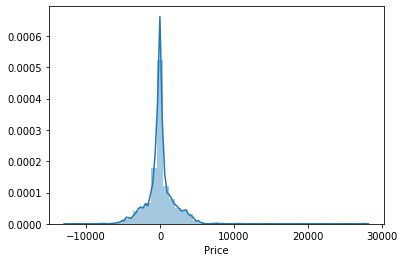

In [90]:
predict(RandomForestRegressor(), 1)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6153163368255287
Predictions are :
 [ 6623.02984767 12633.51197928 11578.25074211 ... 11640.29967579
  3386.4751323   6918.00150043]


r2 score is : 0.616397528304519
MAE :  1948.2731424236852
MSE :  7472607.412046506
RMSE :  44.1392471891364


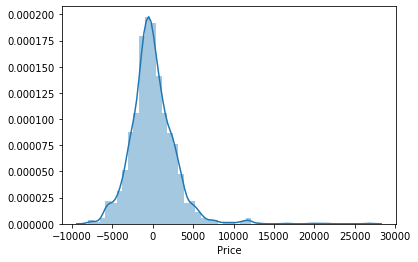

In [92]:
predict(LinearRegression(), 0)

Training score : 0.9691215346399047
Predictions are :
 [ 8040. 12954. 12373. ...  9663.  4823.  7229.]


r2 score is : 0.7451298774036768
MAE :  1309.639463422243
MSE :  4964890.759969844
RMSE :  36.18894117575482


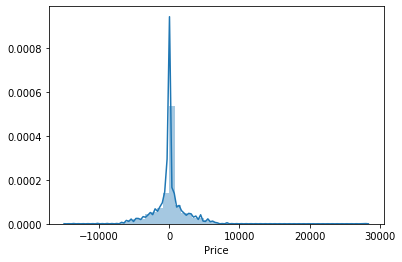

In [93]:
predict(DecisionTreeRegressor(), 0)

Training score : 0.7826543959636959
Predictions are :
 [ 6024.  14004.  11446.8 ... 10880.8  4467.4  6849.4]


r2 score is : 0.6471055888023567
MAE :  1789.1323350491343
MSE :  6874411.89085634
RMSE :  42.29813630704235


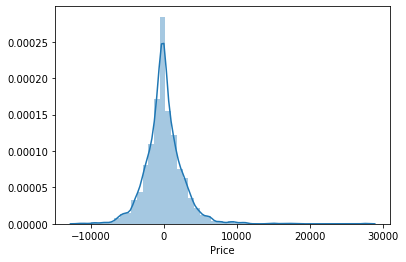

In [94]:
predict(KNeighborsRegressor(), 0)